In [9]:
!pip install rdkit
!pip install dgl
!pip install networkx

You should consider upgrading via the 'C:\Users\qinghegao\git\AI-in-Bio-Chemical-Engineering-Lecture-Coding\venv\Scripts\python.exe -m pip install --upgrade pip' command.



  Using cached dgl-2.0.0-cp39-cp39-win_amd64.whl (4.6 MB)
  Using cached torchdata-0.7.1-cp39-cp39-win_amd64.whl (1.3 MB)


You should consider upgrading via the 'C:\Users\qinghegao\git\AI-in-Bio-Chemical-Engineering-Lecture-Coding\venv\Scripts\python.exe -m pip install --upgrade pip' command.


## Molecualr descriptors

In [5]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw # For 2D representation of molecule


# Create a molecule object for benzene
benzene = Chem.MolFromSmiles('C1=CC=CC=C1')

# Adding H-atoms to fulfil valency of C -atom 
benzene =  Chem.AddHs (benzene)

# Visualize molecule in 2D
mol_image = Draw.MolToImage (benzene) 
mol_image.show()

# Calculate some molecular descriptors for benzene
molecular_weight = Descriptors.MolWt(benzene)
num_rings = Descriptors.RingCount(benzene)


print('Benzene has molecular weight: ', molecular_weight)
print('Benzene has the number of ring: ', num_rings)


Benzene has molecular weight:  78.11399999999996
Benzene has the number of ring:  1


## Molecular graph

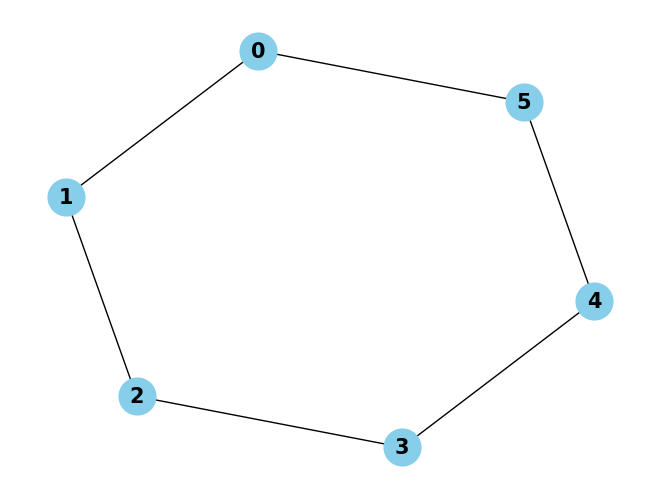

Graph(num_nodes=6, num_edges=12,
      ndata_schemes={}
      edata_schemes={})

In [6]:
import dgl
import networkx as nx
import matplotlib.pyplot as plt
# Benzene SMILES string
smiles_string = 'C1=CC=CC=C1'
# Converting SMILES string to RDKit molecule
molecule = Chem.MolFromSmiles(smiles_string)
# Drawing the molecule
Draw.MolToImage(molecule)
# Creating a graph from the RDKit molecule
# Note: DGL (Deep Graph Library) works with graphs, so we need to convert our molecule into a graph representation.
# Each atom in the molecule can be considered as a node, and bonds as edges.

# Initializing an empty graph
G = nx.Graph()

# Adding nodes with atom type as node attribute
for atom in molecule.GetAtoms():
    G.add_node(atom.GetIdx(), atom_type=atom.GetSymbol())

# Adding edges between nodes
for bond in molecule.GetBonds():
    G.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())

# Visualizing the graph with NetworkX
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, font_size=15, font_weight='bold')
plt.show()
# Converting the NetworkX graph to a DGL graph
# DGL requires numerical features for nodes and edges. Here, we are simply using node indices as features.
# In practice, you would use more informative features (e.g., atom type, bond type).
dgl_graph = dgl.from_networkx(G)
dgl_graph

# Graph Neural Network

In [16]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
from dgl.nn import GraphConv

class SimpleGCN(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):
        super(SimpleGCN, self).__init__()
        self.conv1 = GraphConv(in_feats, hidden_size)
        self.conv2 = GraphConv(hidden_size, num_classes)

    def forward(self, g, inputs):
        # g is the graph and inputs is the input node features
        h = self.conv1(g, inputs)
        h = torch.relu(h)
        h = self.conv2(g, h)
        return h

# Example usage
# Assume a graph `g` and input features `features` are already defined
# g = Your graph
# features = Your input node features as a PyTorch tensor
# Initialize the model
model = SimpleGCN(in_feats=1, hidden_size=16, num_classes=2)
print(model)

SimpleGCN(
  (conv1): GraphConv(in=1, out=16, normalization=both, activation=None)
  (conv2): GraphConv(in=16, out=2, normalization=both, activation=None)
)
